### Shots/ Goals Creator

This graph shows the best playmakers in the premier league this season

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_excel('creator.xlsx', header=1)

In [60]:
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,...,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,22-009,2000,19.0,23,1.21,...,0,4,0.21,4,0,0,0,0,0,Matches
1,2,Che Adams,sct SCO,FW,Southampton,25-184,1996,9.9,20,2.01,...,1,2,0.20,1,0,0,0,0,1,Matches
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20-221,2001,8.0,15,1.88,...,1,1,0.13,0,1,0,0,0,0,Matches
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23-271,1998,7.3,7,0.96,...,0,0,0.00,0,0,0,0,0,0,Matches
4,5,Nathan Aké,nl NED,DF,Manchester City,26-329,1995,6.5,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,479,Wilfried Zaha,ci CIV,FW,Crystal Palace,29-064,1992,15.5,51,3.30,...,0,6,0.39,5,0,1,0,0,0,Matches
479,480,Oleksandr Zinchenko,ua UKR,DF,Manchester City,25-029,1996,5.6,16,2.84,...,0,3,0.53,3,0,0,0,0,0,Matches
480,481,Hakim Ziyech,ma MAR,"FW,MF",Chelsea,28-300,1993,6.1,30,4.91,...,1,4,0.65,3,0,1,0,0,0,Matches
481,482,Kurt Zouma,fr FRA,DF,West Ham,27-078,1994,10.8,2,0.19,...,0,0,0.00,0,0,0,0,0,0,Matches


In [61]:
df = df[['Rk', 'Player', 'Pos', 'Squad', '90s', 'SCA', 'SCA90', 'GCA','GCA90']] # Keep only relevant columns

In [62]:
df = df[df['90s']>=10] # Select only players who have played 10 full games or more

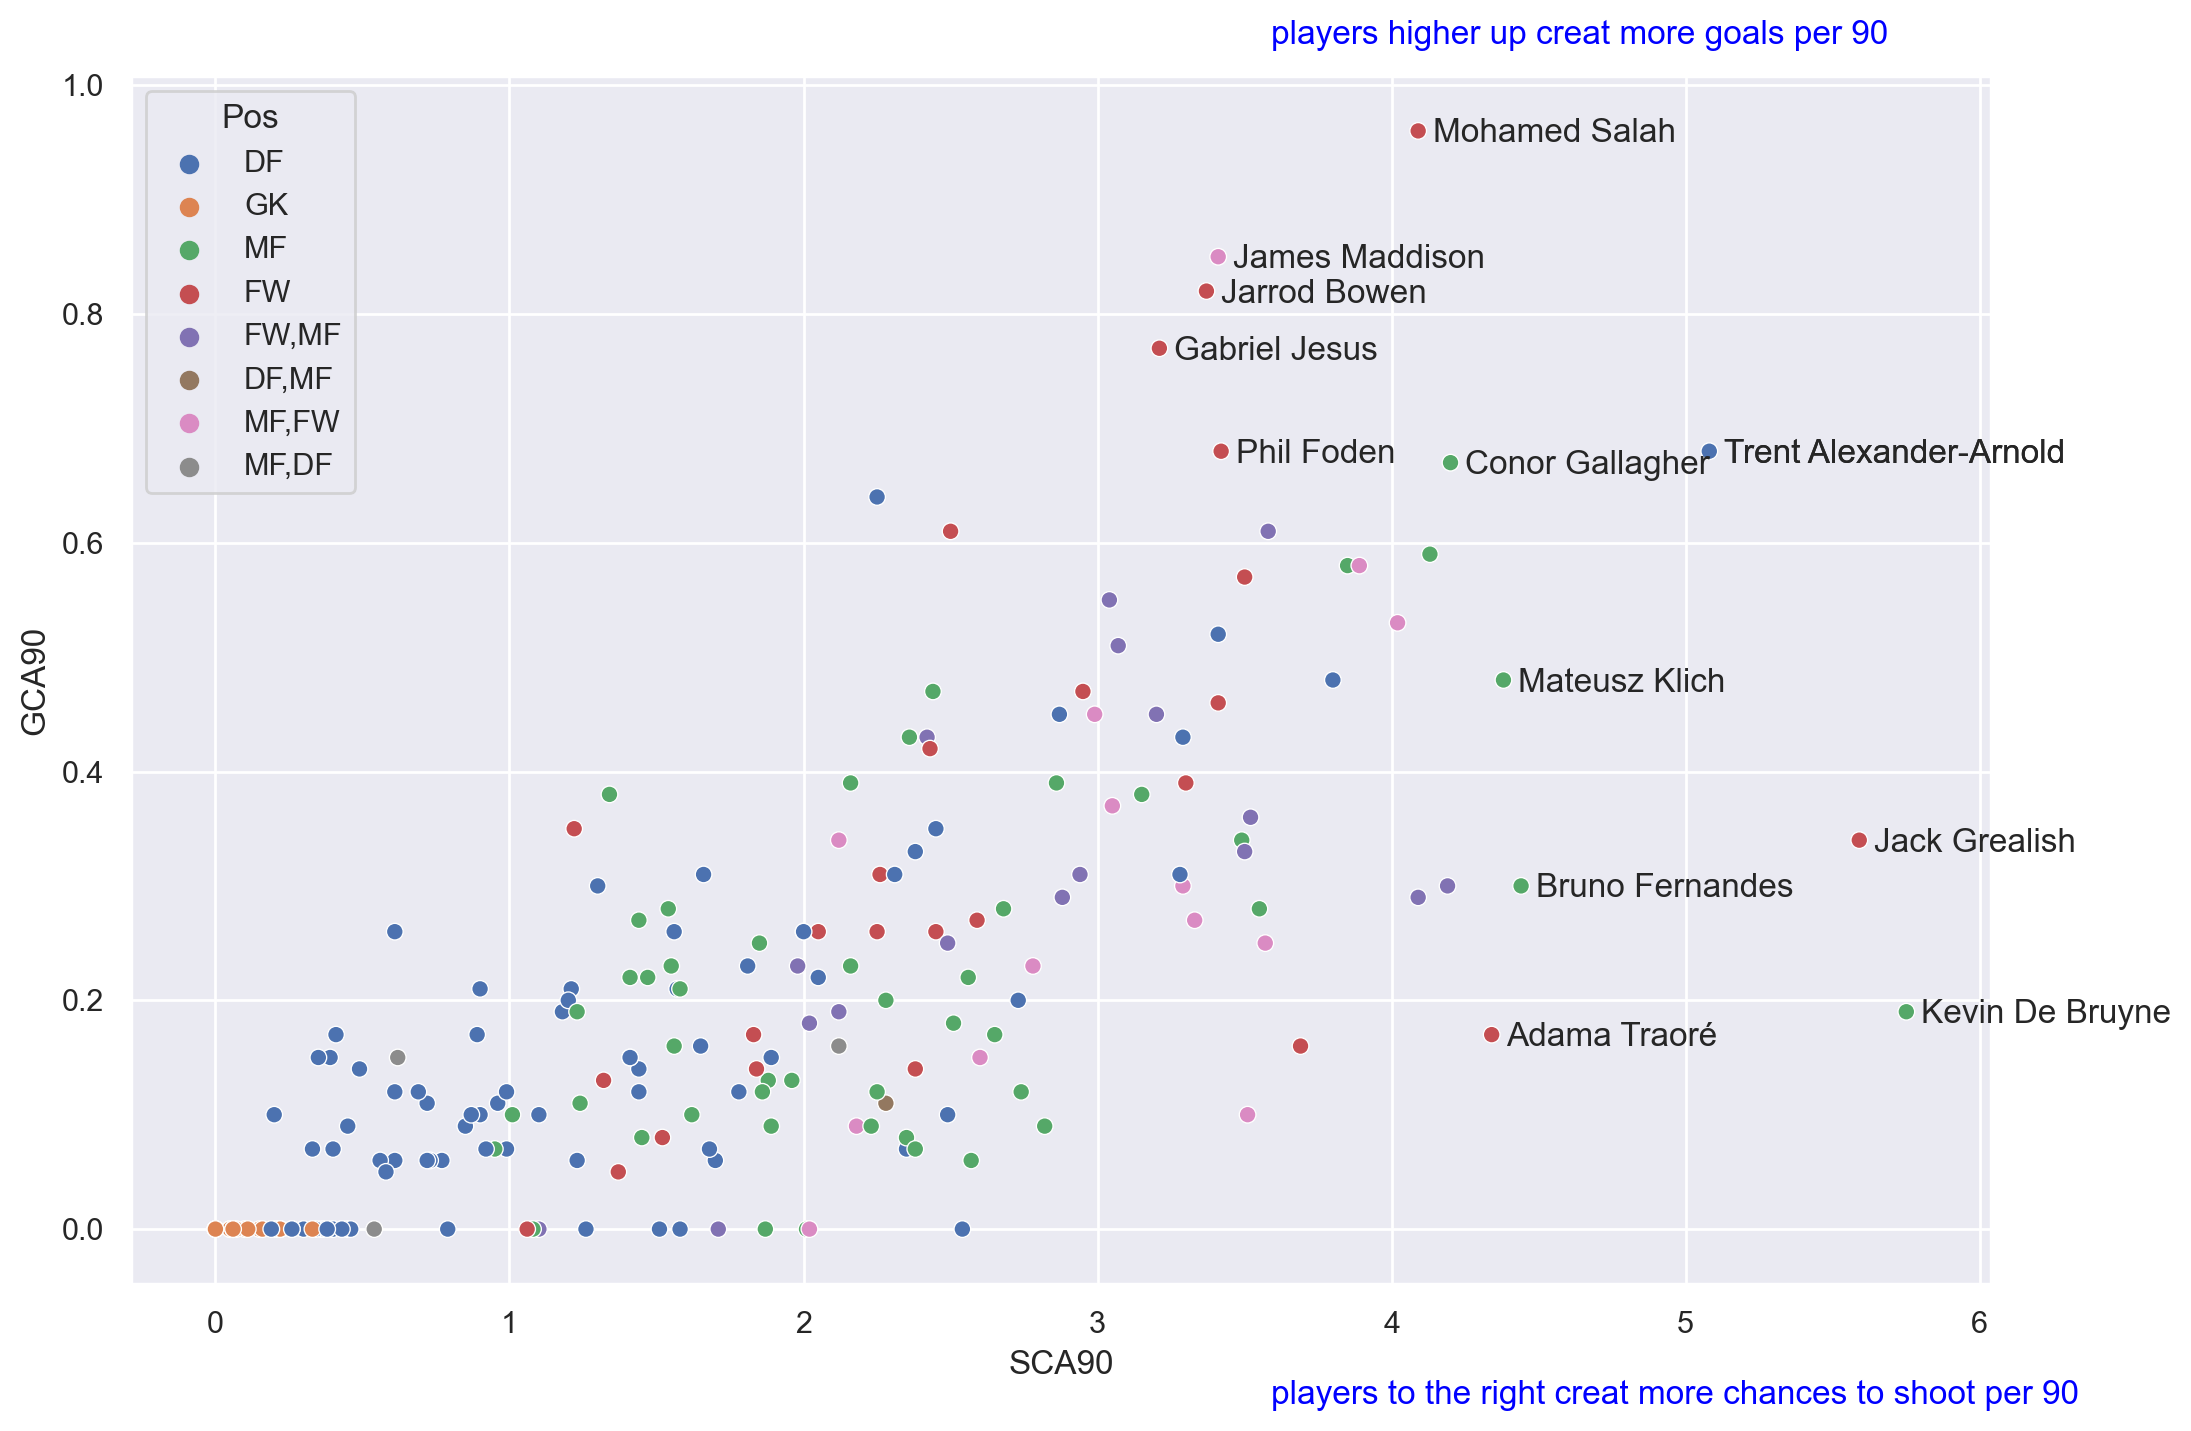

In [66]:
fig = plt.figure(figsize=(12,8), dpi=200)

sns.set_theme()
ax = sns.scatterplot(data=df, x='SCA90',y='GCA90', hue='Pos')
# fig.legend(loc='upper left', title='Position')
sns.move_legend(ax, loc='upper left')

top_players = [x for x in df.sort_values('SCA90', ascending=False)['Player'].head(7)]
top_players = top_players + [x for x in df.sort_values('GCA90', ascending=False)['Player'].head(6)]
for player in top_players:
    plt.text(x=df['SCA90'][df['Player']==player]+0.05, 
             y=df['GCA90'][df['Player']==player]-0.01,
             s=player)
plt.text(x=0.6,y=0.05,transform=fig.transFigure,
         s = 'players to the right creat more chances to shoot per 90', color='blue')
plt.text(x=0.6,y=0.9,transform=fig.transFigure,
         s = 'players higher up creat more goals per 90', color='blue')
fig.savefig('creator.png')

Trent Alexander-Arnold as a right back has impressively high amount of Shots and Goals creating actions

### Shooting Performance

This graphs shows players that shoots most often and who are clinical vs. wasteful in front of goal.

In [33]:
df = pd.read_excel('finisher.xlsx', header=1)

In [34]:
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,22-009,2000,19.0,0,9,...,20.2,0,0,0,0.6,0.6,0.06,-0.6,-0.6,Matches
1,2,Che Adams,sct SCO,FW,Southampton,25-184,1996,9.9,4,22,...,14.5,0,0,0,2.7,2.7,0.12,1.3,1.3,Matches
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20-221,2001,8.0,0,6,...,15.1,0,0,0,0.3,0.3,0.05,-0.3,-0.3,Matches
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23-271,1998,7.3,0,2,...,9.9,0,0,0,0.2,0.2,0.09,-0.2,-0.2,Matches
4,5,Nathan Aké,nl NED,DF,Manchester City,26-329,1995,6.5,1,2,...,6.0,0,0,0,0.3,0.3,0.14,0.7,0.7,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,479,Wilfried Zaha,ci CIV,FW,Crystal Palace,29-064,1992,15.5,5,26,...,19.0,0,2,2,3.5,1.9,0.07,1.5,1.1,Matches
479,480,Oleksandr Zinchenko,ua UKR,DF,Manchester City,25-029,1996,5.6,0,5,...,23.4,0,0,0,0.1,0.1,0.03,-0.1,-0.1,Matches
480,481,Hakim Ziyech,ma MAR,"FW,MF",Chelsea,28-300,1993,6.1,1,27,...,18.7,1,0,0,2.5,2.5,0.09,-1.5,-1.5,Matches
481,482,Kurt Zouma,fr FRA,DF,West Ham,27-078,1994,10.8,1,4,...,5.6,0,0,0,0.3,0.3,0.08,0.7,0.7,Matches


In [35]:
df = df[['Rk', 'Player', 'Pos', 'Squad', '90s',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist',
       'npxG/Sh', 'G-xG', 'np:G-xG']] # Keep only relevant columns

In [36]:
df = df[df['90s']>=10] # Select only players who have played 10 full games or more

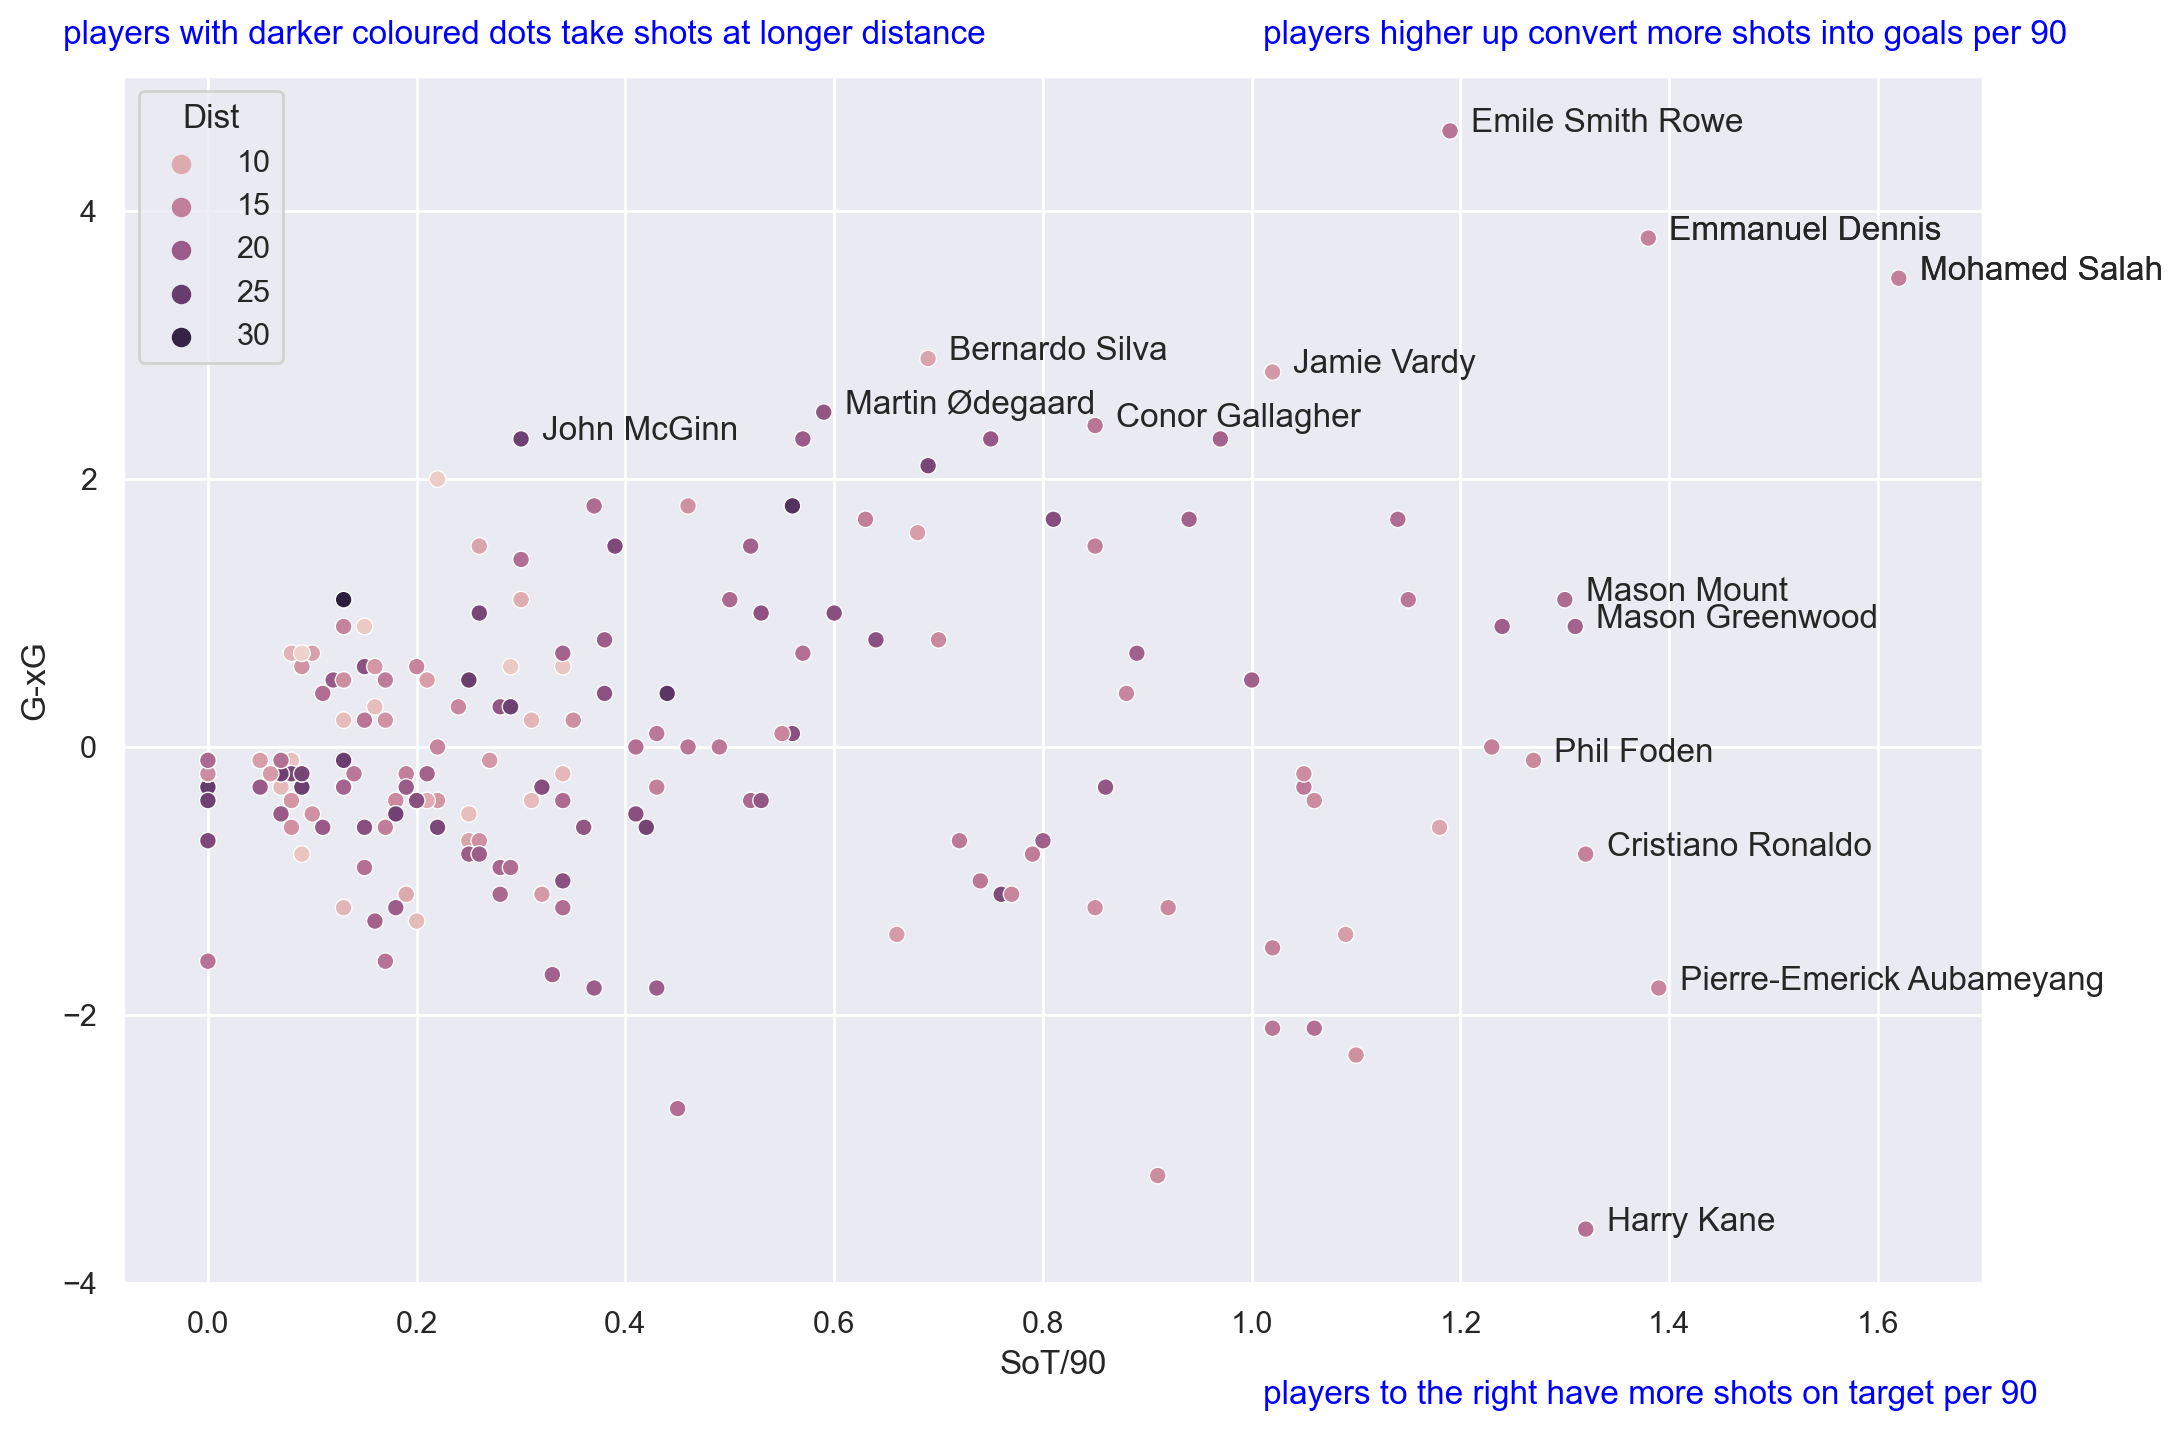

In [57]:
fig = plt.figure(figsize=(12,8), dpi=200)

sns.set_theme()
ax = sns.scatterplot(data=df, x='SoT/90',y='G-xG', hue='Dist')
# fig.legend(loc='upper left', title='Position')
sns.move_legend(ax, loc='upper left')

top_players = [x for x in df.sort_values('SoT/90', ascending=False)['Player'].head(8)]
top_players = top_players + [x for x in df.sort_values('G-xG', ascending=False)['Player'].head(8)]
for player in top_players:
    plt.text(x=df['SoT/90'][df['Player']==player]+0.02, 
             y=df['G-xG'][df['Player']==player]-0.01,
             s=player)
plt.text(x=0.6,y=0.05,transform=fig.transFigure,
         s = 'players to the right have more shots on target per 90', color='blue')
plt.text(x=0.6,y=0.9,transform=fig.transFigure,
         s = 'players higher up convert more shots into goals per 90', color='blue')
plt.text(x=0.1,y=0.9,transform=fig.transFigure,
         s = 'players with darker coloured dots take shots at longer distance', color='blue')
fig.savefig('finisher.png')